In [1]:
import tensorflow as tf

Building a model with the functional API works like this:

- A layer instance is callable and returns a tensor.
- Input tensors and output tensors are used to define a tf.keras.Model instance.
- This model is trained just like the Sequential model.

# 1. Build Model with Input & Output Tensors

In [2]:
# starts from Input layer:
# sample dimension is not considered for the `shape` argument,
# but counted in the return shape: [None, 28*28] 
inputs = tf.keras.Input(shape=(28*28,)) 

# hidden layer 1
x = tf.keras.layers.Dense(256, activation='relu')(inputs)

# hidden layer 2
x = tf.keras.layers.Dense(128, activation='relu')(x)

# output layer
x = tf.keras.layers.Dense(10)(x)
outputs = tf.keras.layers.Softmax()(x)

# build model by passing inputs and outputs tansor
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


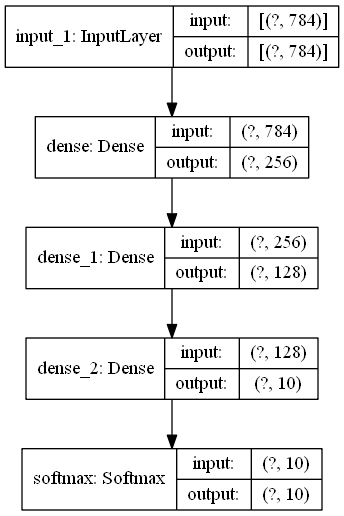

In [5]:
# Windows 10:
# 1. pip install pydot, graphviz
# 2. download graphviz: https://graphviz.gitlab.io/_pages/Download/Download_windows.html
#    then add to PATH env. variable
tf.keras.utils.plot_model(model, to_file='mnist_model.png', show_shapes=True)

## 2. Train and Test Model

In [5]:
# compiling model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [6]:
# A callback is an object passed to a model to customize and extend its behavior during training
import os
callbacks = [
    # Interrupt training if `val_loss` stops improving for over 2 epochs
    tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
    # Write TensorBoard logs to `./logs` directory
    tf.keras.callbacks.TensorBoard(log_dir=os.path.join('tensorboard')) # start visualization: tensorboard --logdir mylogdir
]

In [7]:
# load dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28*28).astype('float32') / 255
x_test = x_test.reshape(10000, 28*28).astype('float32') / 255

# training
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=5, 
                    validation_split=0.2, # or set validation set explictly: validation_data=(x_test, y_test)
                    callbacks=callbacks)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 67us/sample - loss: 1.5842 - accuracy: 0.8924 - val_loss: 1.5247 - val_accuracy: 0.9410
Epoch 2/5
48000/48000 [==============================] - 3s 54us/sample - loss: 1.5164 - accuracy: 0.9485 - val_loss: 1.5111 - val_accuracy: 0.9530
Epoch 3/5
48000/48000 [==============================] - 3s 56us/sample - loss: 1.5015 - accuracy: 0.9620 - val_loss: 1.5013 - val_accuracy: 0.9615
Epoch 4/5
48000/48000 [==============================] - 3s 54us/sample - loss: 1.4929 - accuracy: 0.9700 - val_loss: 1.4953 - val_accuracy: 0.9672
Epoch 5/5
48000/48000 [==============================] - 3s 53us/sample - loss: 1.4881 - accuracy: 0.9744 - val_loss: 1.4947 - val_accuracy: 0.9672


In [8]:
# test
test_scores = model.evaluate(x_test, y_test, verbose=2) # loss, accuracy

10000/10000 - 1s - loss: 1.4960 - accuracy: 0.9657
